# measurement of events from $^{22}$Na decay
$^{22}$Na source activity is 10 uC

Mar-11,2021

events collected using 
/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/CPP/BoxSi_proto2.1_event_collector

In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [2]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/SingleAnalyzer/'

In [3]:
dT = 100; # sec

In [4]:
events = pd.read_csv(data_path + 'Na22_10uC_%d_sec_events.csv'%dT,)

## Rossi-$\alpha$ distribution


In [5]:
time_differences_ms = pd.read_csv(data_path + 'Na22_10uC_%d_sec_time_differences.csv'%dT,)

In [6]:
dt_ms_max = 2;
dt_ms_arr = np.array(time_differences_ms['dt[ms]'])
print len(dt_ms_arr),'time differences from %d sec.'%dT
print 'min(dt_ms_arr):%.7f, max(dt_ms_arr):%.7f'%(np.min(dt_ms_arr),np.max(dt_ms_arr))
dt_ms_arr

1069324 time differences from 100 sec.
min(dt_ms_arr):0.0000001, max(dt_ms_arr):9.9999930


array([0.21697634, 0.30793279, 0.58036589, ..., 2.42287395, 2.56484938,
       0.14197543])

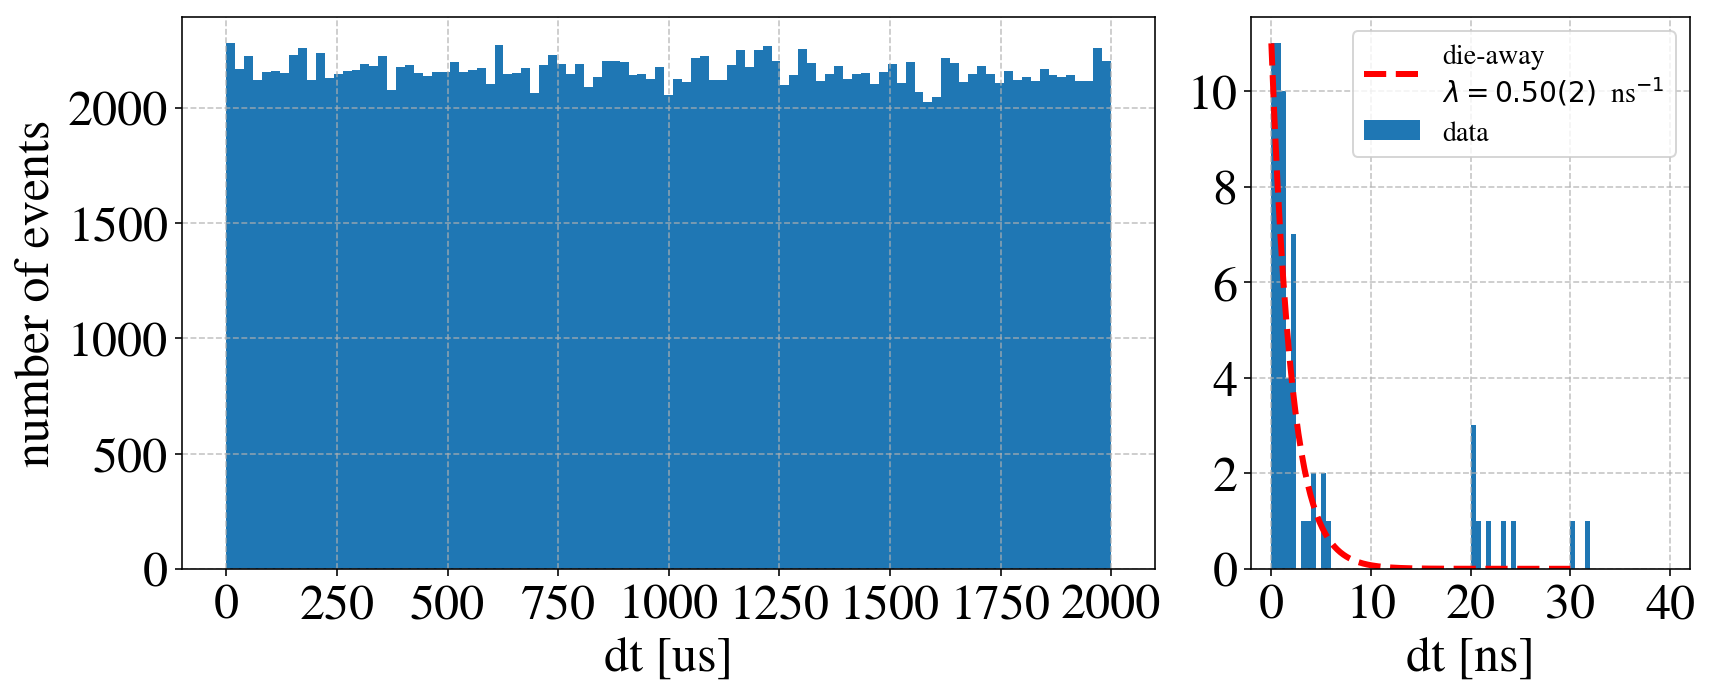

In [7]:
fig=plt.figure(figsize=(12,5));
ax=fig.add_subplot(1,3,(1,2))
plt.hist( dt_ms_arr*1e3 , bins=np.linspace(0,2000,100));
set_axes(ax,'dt [us]','number of events',do_add_grid=True)

ax=fig.add_subplot(1,3,3)
h,bins,patches=plt.hist( dt_ms_arr*1e6 , bins=np.linspace(0,40,81),label='data');
# Fit a Gaussian to find the system die-away time
def dieaway_function(t,lambda_dieaway,N0):
    return N0*np.exp(-lambda_dieaway*t)

t_fit = np.linspace(0,30,200)
tau_dieaway = 2 # ns
lambda_dieaway = 1./tau_dieaway;
N0 = h[0]
plt.plot(t_fit,dieaway_function(t_fit,lambda_dieaway,N0),'--r',linewidth=3,
         label='die-away\n$\lambda=%.2f(%.0f)$  ns$^{-1}$'%(lambda_dieaway,lambda_dieaway*5))
set_axes(ax,'dt [ns]','',do_add_grid=True,
         xticks=(0,10,20,30,40),do_add_legend=True)
ax.legend(fontsize=14)
# ax.set_yscale('log')
plt.tight_layout()